<a href="https://colab.research.google.com/github/caiolgomes/Caio_portifolio/blob/main/Clothes_classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying clothes using deep learning
*** Fashion MNIST *** is a standard *dataset* used in **Deep Learning** and **Computer Vision**, containing 70,000 images from 10 different classes.

Despite bringing pre-processed images, it represents a good challenge to apply deep neural networks. Specifically, it serves to demonstrate a special type of neural networks, convolutional neural networks (*Convolutional Neural Networks* - **CNN**).

The *dataset* is divided between training (60,000 samples) and testing (10,000 samples), with each image having dimensions of 28 x 28 *pixels*.

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/fashion-mnist-sprite.png" height="400px"></p>

Each image belongs exclusively to a single class. The table below follows the Fashion MNIST documentation, where the possible 10 *labels* are documented:

<table>
  <tbody><tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</tbody></table>

This *dataset* was created to replace the traditional MNIST, where the images were purely handwritten digits. Among the main reasons, the original MNIST was:

* Very easy, since CNN was able to easily reach 99.7% accuracy.
* It no longer represented the modern challenges of Computer Vision.

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/embedding.gif" height="300px"></p>

# Data acquisition

there are two ways to obtain the data from Fashion Minst:
* [Directly from the repository on Github]((https://github.com/zalandoresearch/fashion-mnist)
* Loaded from TensorFlow itself

in this project i'll load it from TensorFlow

In [2]:
#Neccessary libraries
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

# Visualization settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

In [3]:
#Loading the data into train and test variables
(X_train_orig, y_train_orig), (X_test_orig, y_test_orig) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirts/Top', 'pants', 'sweater',
               'dress','coat', 'Sandals',
               'shirt', 'sneaker', 'bag', 'boots']

## Closer look at the data

Although this data set comes pre-processed and well-documented, we’ll explore quickly to get some *insights*. First, I will check the dimensions of the *arrays* returned by the `fashion_mnist.load_data ()` function.

As previously seen, there are 60,000 samples of training and 10,000 of tests, the images being 28 x 28 * pixels * in shades of gray (1 channel).

It is also possible to see what an image "looks like" when it is converted to an * array *. It is worth remembering that the values ​​of each *pixel* are comprised between $[0, 255]$.

In [5]:
#Checking dimensions of the DataFrames
print("Dimensonality of DataFrames:")
print("X_train_orig:", X_train_orig.shape)
print("y_train_orig:", y_train_orig.shape)
print("X_test_orig:", X_test_orig.shape)
print("y_test_orig:", y_test_orig.shape)

#Checking a slice of the image
print("\n\nImage converted in array:\n", X_train_orig[0][:5][:5])

Dimensonality of DataFrames:
X_train_orig: (60000, 28, 28)
y_train_orig: (60000,)
X_test_orig: (10000, 28, 28)
y_test_orig: (10000,)


Image converted in array:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]]


I will check if the training / test datasets are properly balanced. That is, if it contains an ideal proportion between the different classes.

In [6]:
#returning unique values for each class(train)
print("y_train_orig:")
np.unique(y_train_orig, return_counts=True)

y_train_orig:


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [7]:
#returning unique values for each class(test)
print("y_test_orig:")
np.unique(y_train_orig, return_counts=True)

y_test_orig:


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

There is little to be explored in this preliminary exploratory analysis, as it is more than a step towards increasing situational awareness about the *dataset*.

Finally, let's view some images with their *labels*.

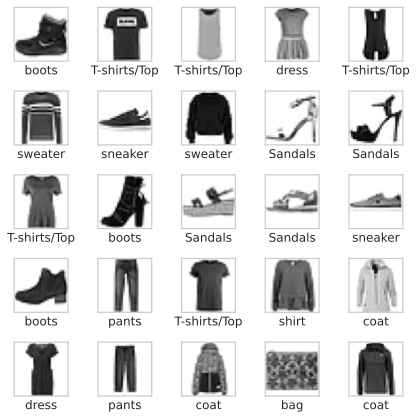

In [8]:
#some examples of images
plt.figure(figsize=(6,6))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_orig[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_orig[i]])
plt.tight_layout()

## Pre-processing data

Before creating the model and training the neural network, I will go through some pre-processing steps.

### Normalizing *Pixels*

The intensities of the *pixels* must be normalized, that is, the integer values ​​must be converted into the type `float` and stay within the range $ [0, 1] $.

Here, as the maximum value of the *pixel* is 255, just divide all *individual* pixels by 255.0 and they will be normalized and of the type `float`.

In [9]:
# creaating a lambda function to normalize Pixels
f = lambda x: (x / 255.0).astype("float32")

# Applying the lambda function to the datasets X_train e X_test
X_train = f(X_train_orig)
X_test = f(X_test_orig)

### Redimensioning the images

The first convolutional *layer* expects a single tensor that contains all *pixels*. TensorFlow expects a single list with 4 dimensions, not 60000 items of dimensions 28 x 28 x 1, as is the case with the training dataset (the same goes for the test data).


In [10]:
# Redimensioning images
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

print("X_train:{}".format(X_train.shape))
print("X_test:\t{}".format(X_test.shape))

X_train:(60000, 28, 28, 1)
X_test:	(10000, 28, 28, 1)


### One-hot Enconding

The *labels* are already encoded between 0 and 9, in what we call *Integer Encoding*. It is possible to directly use `y_train` and` y_test`, as long as `loss =" sparse_categorical_crossentropy "` is used.

However, using them directly can lead the *Deep Learning* model to understand that there is a natural relationship of order between the *labels*, which is not true - it can lead to inferior performance.

For categorical variables where there is no ordinal relationship, I prefer to use the One-Hot Encoding method. To learn more about the differences between these two techniques, [read this article](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/).

see a pratical example of this type of enconding.

In [11]:
example = np.array([1, 3, 4, 2, 0])
print("Example before encoding:")
print(example)

example_encoded = keras.utils.to_categorical(example)
print("\nExample after enconding")
print(example_encoded)

Example before encoding:
[1 3 4 2 0]

Example after enconding
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


In the same way as the example above, let's apply *one-hot encoding *to* labels*.

In [12]:
y_train = keras.utils.to_categorical(y_train_orig)
y_test = keras.utils.to_categorical(y_test_orig)

### Definig Convolutional Neural Networks

There are a number of established CNN architectures. For this project, a simplified VGGNet architecture will be used, implemented in an article by Data Scientist Adrian Rosebroke.

The original implementation was adapted by me, in order to adapt the 28 x 28 dimensions of our images and allow the use of the Keras API.

In [13]:
# based on the implementation of MiniVGGNet by Adrian Rosebroke
# first CONV => RELU => CONV => RELU => POOL layer set
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, 3, padding="same", activation='relu',))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

# second CONV => RELU => CONV => RELU => POOL layer set
model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

# first (and only) set of FC => RELU layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

# softmax classifier
model.add(keras.layers.Dense(10, activation='softmax'))

As mentioned earlier, once the *labels* are *one-hot encoded*, `loss =" categorical_crossentropy "` will be used to compile the model.

The use of 1/3 validation data will also be explicitly reported.

In [14]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

#Training the model and saving the informations in the "histroy" variable
history = model.fit(X_train, y_train, epochs=20, validation_split=0.3)

Epoch 1/20
1313/1313 [==============================] - 42s 8ms/step - loss: 0.7409 - accuracy: 0.7585 - val_loss: 0.3471 - val_accuracy: 0.8739
Epoch 2/20
1313/1313 [==============================] - 10s 8ms/step - loss: 0.3583 - accuracy: 0.8718 - val_loss: 0.3274 - val_accuracy: 0.8991
Epoch 3/20
1313/1313 [==============================] - 10s 8ms/step - loss: 0.2948 - accuracy: 0.8933 - val_loss: 0.2437 - val_accuracy: 0.9130
Epoch 4/20
1313/1313 [==============================] - 10s 8ms/step - loss: 0.2745 - accuracy: 0.9001 - val_loss: 0.2681 - val_accuracy: 0.9041
Epoch 5/20
1313/1313 [==============================] - 10s 8ms/step - loss: 0.2543 - accuracy: 0.9094 - val_loss: 0.2454 - val_accuracy: 0.9133
Epoch 6/20
1313/1313 [==============================] - 10s 8ms/step - loss: 0.2449 - accuracy: 0.9085 - val_loss: 0.2152 - val_accuracy: 0.9241
Epoch 7/20
1313/1313 [==============================] - 10s 8ms/step - loss: 0.2195 - accuracy: 0.9210 - val_loss: 0.2389 - val_ac

## Evaluating the Model
Overall, our model achieved an accuracy of 95.92% in training data and 93.74% in validation data.

However, if we take a closer look we will see that it did not perform well for the "Shirts" category. This can probably be improved with *data augmentation* techniques.

In [15]:
y_hat = model.predict(X_test)
y_hat_classes = np.argmax(y_hat, axis=1)
print(classification_report(y_test_orig, y_hat_classes, target_names=class_names))

              precision    recall  f1-score   support

T-shirts/Top       0.87      0.89      0.88      1000
       pants       0.99      0.99      0.99      1000
     sweater       0.87      0.93      0.90      1000
       dress       0.93      0.93      0.93      1000
        coat       0.89      0.91      0.90      1000
     Sandals       0.98      0.99      0.99      1000
       shirt       0.83      0.74      0.78      1000
     sneaker       0.95      0.98      0.97      1000
         bag       0.99      0.99      0.99      1000
       boots       0.99      0.95      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



Looking at the *accuracy* and *val_accuracy* curves, perhaps a small *overfitting* is identified, but it did not hurt CNN's performance much in the face of validation data.


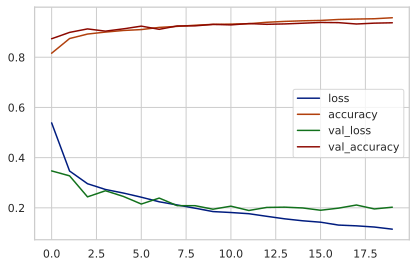

In [16]:
pd.DataFrame(history.history).plot()
plt.show()

Finally, we see that the accuracy in the test *dataset* remains very good, which means that the model is generic enough to handle new data.

In [18]:
score = model.evaluate(X_test, y_test)

# verifying the model performance
print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.2216 - accuracy: 0.9297
Loss: 0.2216
Accuracy: 0.9297
